DATASET DEL ESTUDIO DE SUELOS EN ANTIOQUIA


In [1]:
#importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
data_fields = pd.read_csv('Areas_cultivadas_y_produccion_agr_cola_en_Antioquia_desde_1990-2022_20250716.csv')
display(data_fields.info())
display(data_fields.head(10))
data_fields.dropna(inplace=True) #elimina las columnas no null
data_fields.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32721 entries, 0 to 32720
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo                32721 non-null  object 
 1   Rubro               32721 non-null  object 
 2   Subregion           32721 non-null  object 
 3   Año                 32721 non-null  int64  
 4   Municipio           32721 non-null  object 
 5   Área Total          32680 non-null  float64
 6   Área Producción     32287 non-null  float64
 7   Volumen Producción  32535 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ MB


None

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,Abejorral,45.0,23.0,138.00
1,Permanentes,Aguacate,Urabá,1990,Apartadó,29.0,27.0,405.00
2,Permanentes,Aguacate,Suroeste,1990,Montebello,17.0,12.0,78.00
3,Permanentes,Aguacate,Suroeste,1990,Santa Bárbara,150.0,140.0,980.00
4,Permanentes,Aguacate,Urabá,1990,Turbo,75.0,55.0,825.00
5,Transitorios,Anis,Occidente,1990,Giraldo,35.0,33.5,17.40
6,Transitorios,Arroz Tecnificado,Bajo Cauca,1990,Cáceres,450.0,450.0,900.00
7,Transitorios,Arroz Tecnificado,Bajo Cauca,1990,Caucasia,1700.0,1700.0,6399.99
8,Transitorios,Arroz Tecnificado,Urabá,1990,Mutatá,750.0,355.0,1719.98
9,Transitorios,Arroz Tecnificado,Bajo Cauca,1990,Nechí,1550.0,1480.0,4771.96


Tipo                  0
Rubro                 0
Subregion             0
Año                   0
Municipio             0
Área Total            0
Área Producción       0
Volumen Producción    0
dtype: int64

***NORMALIZACION DE LOS DATOS***


In [3]:
numerical_features = ["Área Total", "Área Producción", "Volumen Producción"]
scaler = MinMaxScaler()
data_fields[numerical_features] = scaler.fit_transform(data_fields[numerical_features])
data_fields.head()

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,Abejorral,0.001250,0.000639,0.000133
1,Permanentes,Aguacate,Urabá,1990,Apartadó,0.000806,0.000750,0.000390
2,Permanentes,Aguacate,Suroeste,1990,Montebello,0.000472,0.000333,0.000075
3,Permanentes,Aguacate,Suroeste,1990,Santa Bárbara,0.004167,0.003889,0.000943
4,Permanentes,Aguacate,Urabá,1990,Turbo,0.002083,0.001528,0.000794


***ENCONDIG***

In [5]:
categorical_columns = ["Tipo", "Rubro", "Subregion", "Municipio"]
for col in categorical_columns:
    data_fields[col] = LabelEncoder().fit_transform(data_fields[col])
data_fields

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,1,6,5,1990,12,0.001250,0.000639,0.000133
1,1,6,7,1990,22,0.000806,0.000750,0.000390
2,1,6,6,1990,85,0.000472,0.000333,0.000075
3,1,6,6,1990,115,0.004167,0.003889,0.000943
4,1,6,7,1990,126,0.002083,0.001528,0.000794
...,...,...,...,...,...,...,...,...
32716,1,150,1,2022,37,0.000083,0.000083,0.000014
32717,1,150,4,2022,91,0.000639,0.000194,0.000013
32718,1,150,7,2022,110,0.000333,0.000333,0.000058
32719,1,150,4,2022,121,0.000583,0.000583,0.000273


<Axes: >

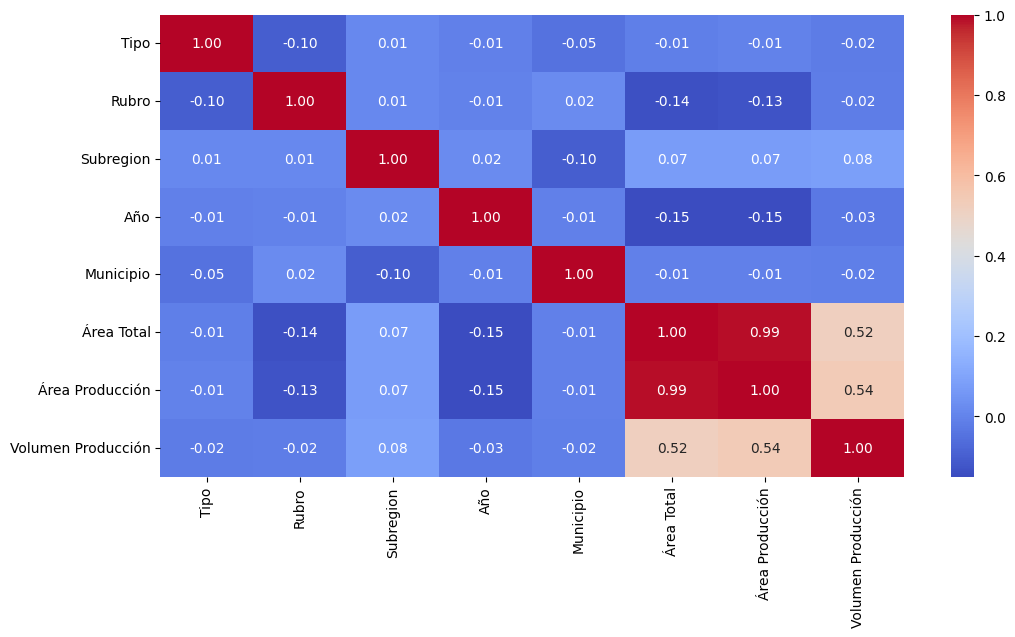

In [6]:
numerical_data = data_fields.select_dtypes(np.number)
plt.figure(figsize=(12,6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

***MACHINE LEARNIG***

In [8]:
Y = data_fields["Rubro"]
X = data_fields.drop(columns=["Rubro"])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

c:\Users\nicol\OneDrive\Escritorio\maching learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'
